In [1]:
# Add imports here
from tgmage import *

# Edit the font, font size, and axes width
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1

Text(0.5, 1.0, 'Ideal Density Temperature Data')

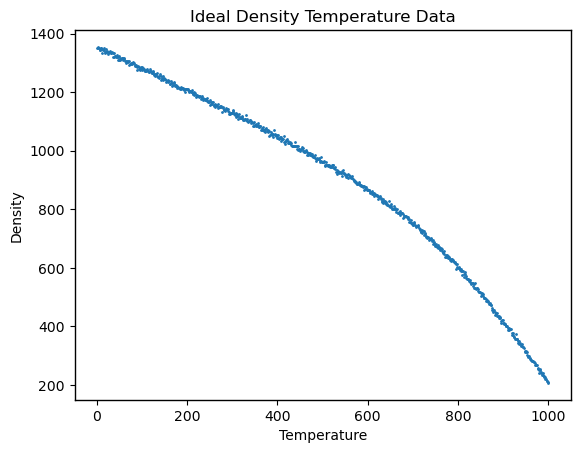

In [2]:
# Generate ideal density data
def rho(T):
    rho_0 = 845
    T_0 = 765
    a = 0.7
    b = 1.7
    c = 9.4
    return rho_0 - a*(T-T_0) - b*(0.5*(T-T_0) + np.sqrt(((T-T_0)**2)/4+np.e**c)) + np.random.normal(0,5,len(T))

Temperature = np.linspace(1,1000,800)
Density = rho(Temperature)

plt.figure()
plt.scatter(Temperature, rho(Temperature), s=1)
plt.ylabel("Density")
plt.xlabel("Temperature")
plt.title("Ideal Density Temperature Data")


 , warmup: 100

Glass Diagnostics
Temperature: [   1.            2.25031289    3.50062578    4.75093867    6.00125156
    7.25156446    8.50187735    9.75219024   11.00250313   12.25281602
   13.50312891   14.7534418    16.00375469   17.25406758   18.50438048
   19.75469337   21.00500626   22.25531915   23.50563204   24.75594493
   26.00625782   27.25657071   28.5068836    29.7571965    31.00750939
   32.25782228   33.50813517   34.75844806   36.00876095   37.25907384
   38.50938673   39.75969962   41.01001252   42.26032541   43.5106383
   44.76095119   46.01126408   47.26157697   48.51188986   49.76220275
   51.01251564   52.26282854   53.51314143   54.76345432   56.01376721
   57.2640801    58.51439299   59.76470588   61.01501877   62.26533166
   63.51564456   64.76595745   66.01627034   67.26658323   68.51689612
   69.76720901   71.0175219    72.26783479   73.51814768   74.76846058
   76.01877347   77.26908636   78.51939925   79.76971214   81.02002503
   82.27033792   83.52065081  

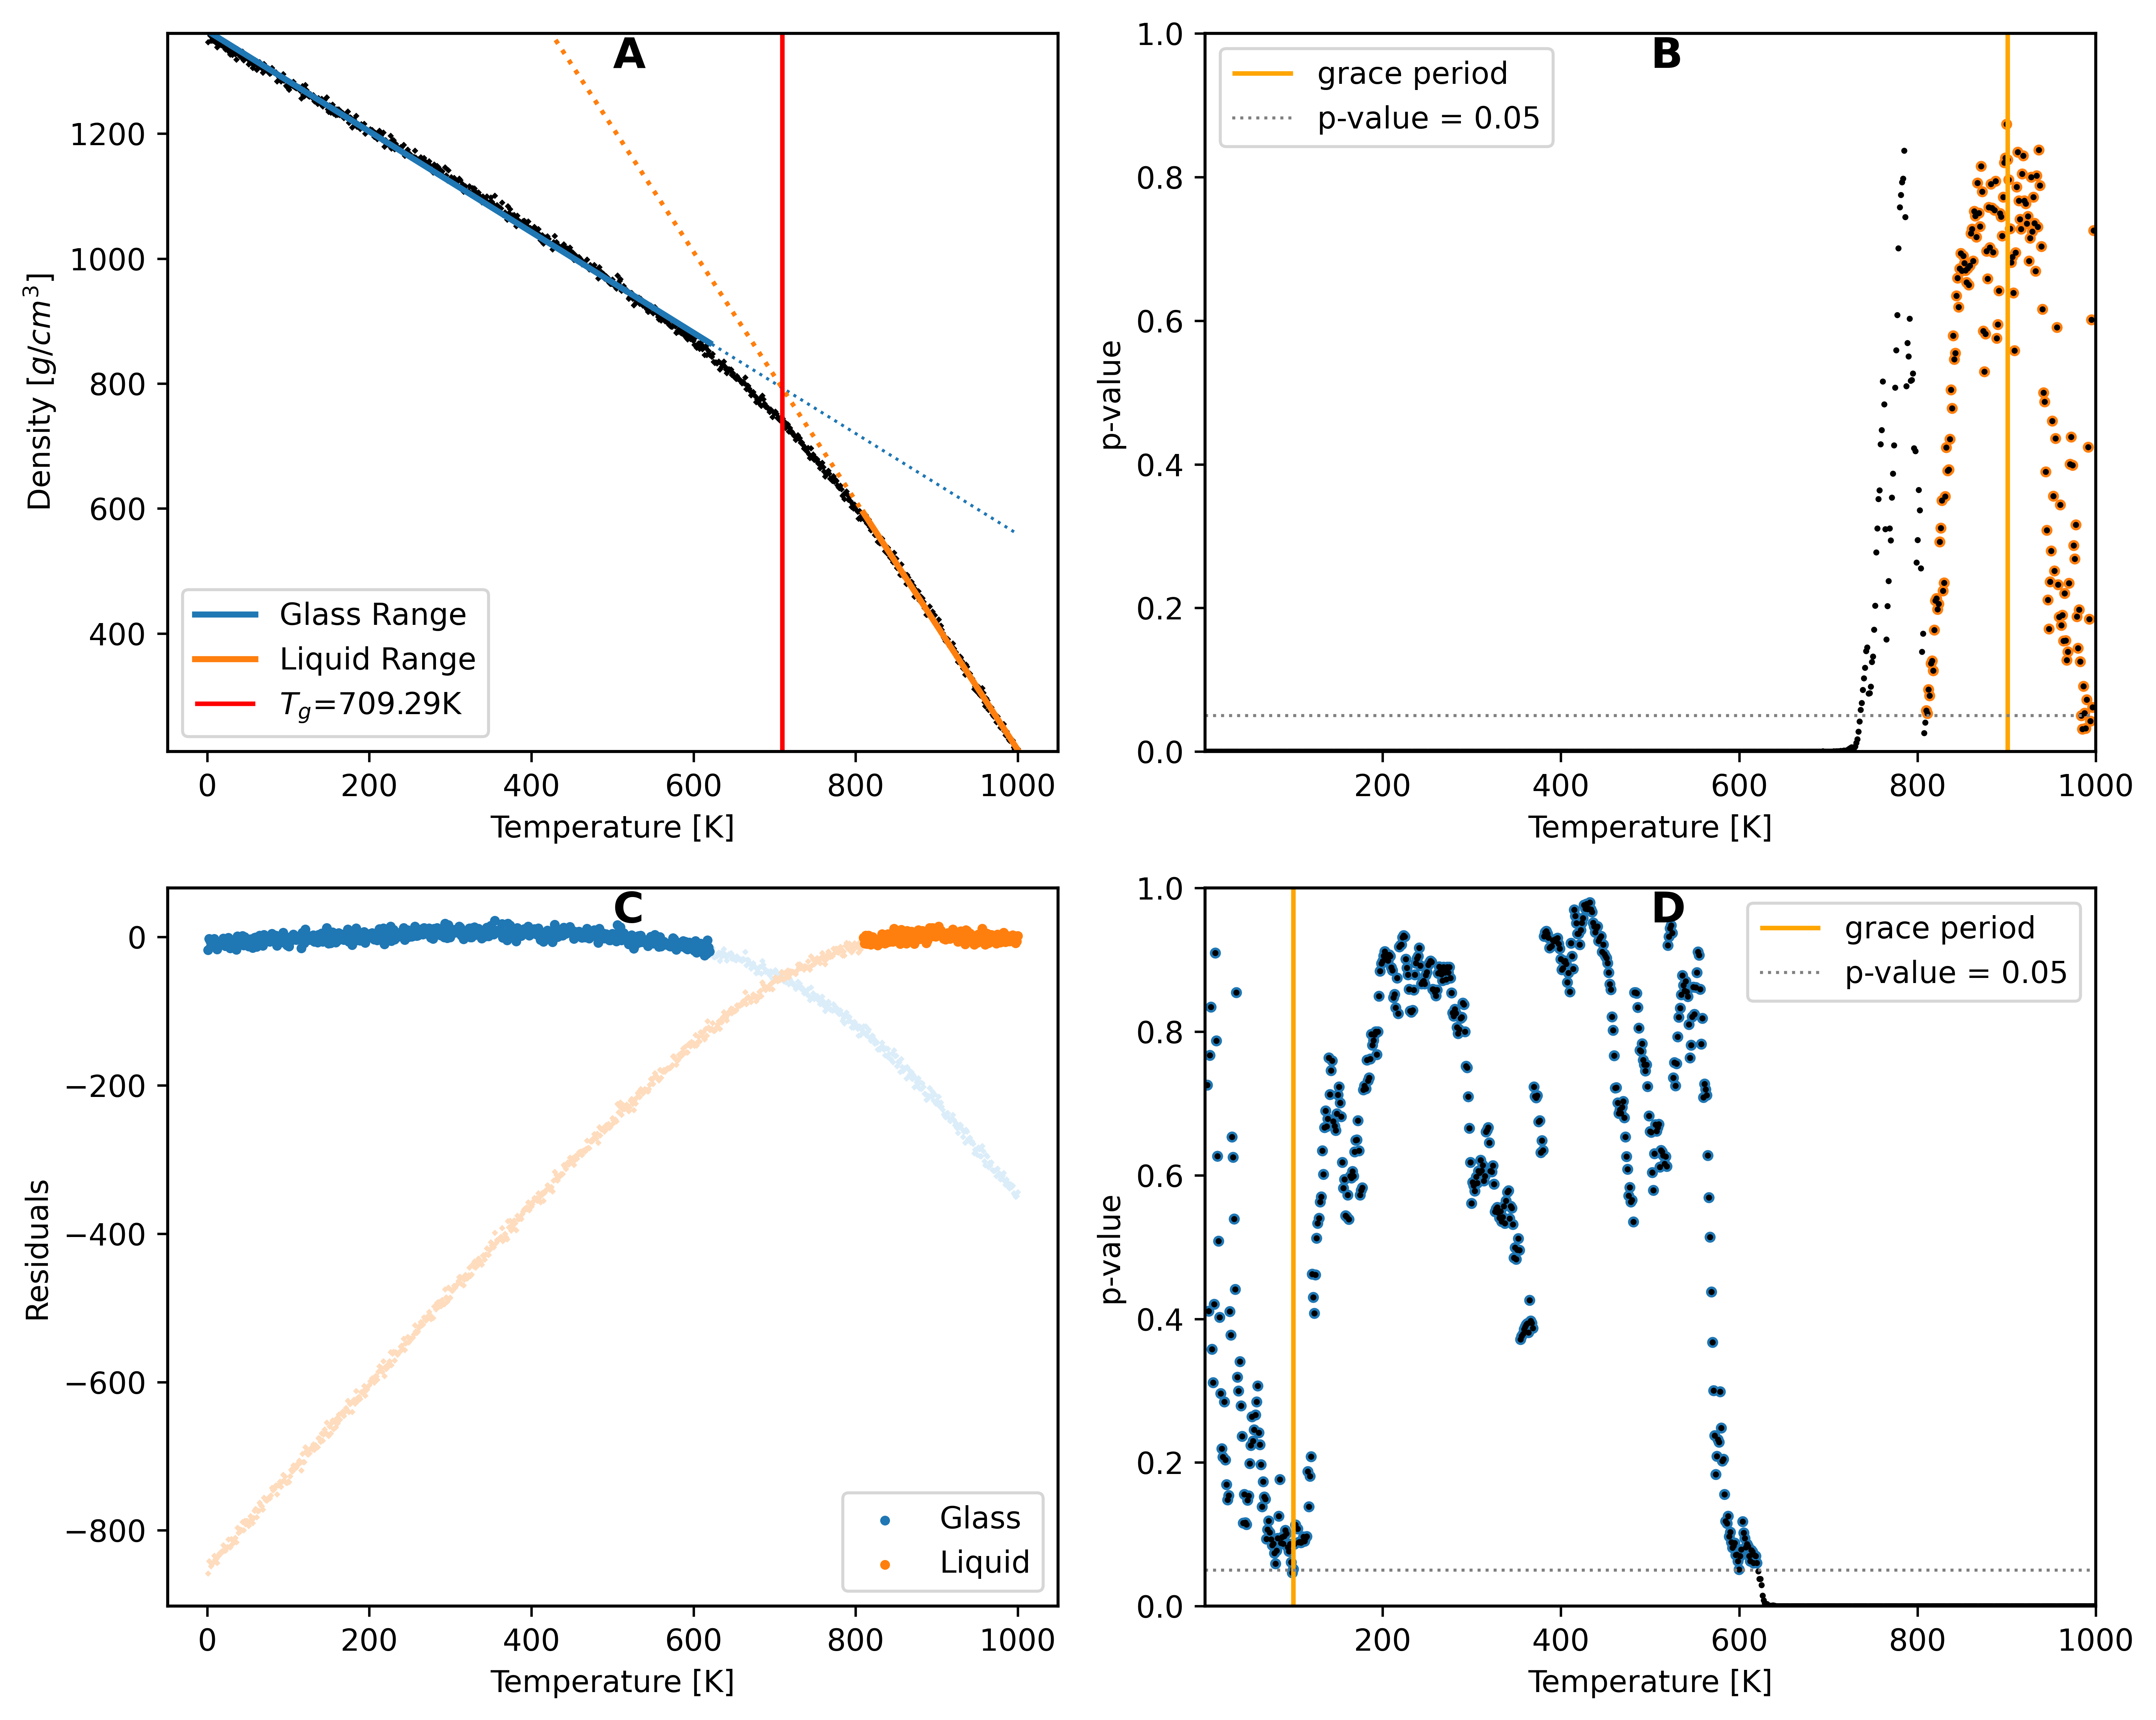

In [3]:
# Old Method
density = np.array([Temperature, Density])
Tf = Tg_finder(density, ' ', warmup=100, verbose=2, save=".")

Parameters of analysis

In [4]:
# Paremeters
MY_ILs = ['Bmim_NTf2', 'Bmim_TFO', 'Emim_NTf2', 'Emim_Cl', 'Emim_PF6', 'Emim_BF4']
Tg = {}
methods = ["density"]
warmups = [30]

Analysis of My simulated systems

In [ ]:
# Load and compute Tg
for il, IL in enumerate(MY_ILs):
    Tg[IL] = {}
    path = f"./data/{IL}"
    # print(path)

    # Load Data 
    density, header_list = thermo_extractor(f"{path}/5K-ns_thermo.txt", wanted_property="Density")
    
    # Temperature Ramp
    T_start = 300
    T_low = 150
    thermostat = np.linspace(T_start, T_low, num=len(density[1]))

    # Construct Density temperature data 
    density[0] = thermostat  
    
    # Flip 
    density = np.flip(density, axis=1)
        
    # Compute Tg with new method V2 
    for warmup in warmups:
        Tg[IL][warmup] = Tg_finder(density, IL, 0.05, warmup, verbose=1, save='.')
        
    # Save everytime
    f = open("Tg.pkl","wb")          
    pickle.dump(Tg,f) # write the python object (dict) to pickle file
    f.close() # close file


Bmim_NTf2, warmup: 30


/afs/crc.nd.edu/user/f/fcarmona/.local/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Tg:  206.7788720064546

Bmim_TFO, warmup: 30

Tg:  220.22862126696634

Emim_NTf2, warmup: 30

Tg:  211.02709326011936

Emim_Cl, warmup: 30

Tg:  225.94238345613624

Emim_PF6, warmup: 30


In [ ]:
Tg